### News about PyPerf Jupyter Kernel (Performance Monitoring and Analysis in Jupyter)
- added metrics to display in Jupyter (mean/max/min, raw values) for: CPU,GPU,Mem
- use dropdown menus to select metrics (interactively)
- use in-memory serialization instead of disk-based for Score-P execution
- modular system for backbone serializer (dill/cloudpickle)

---

**Toy Example:** Estimating Pi by Throwing Darts

In [5]:
%env JUMPER_REPORT_FREQUENCY=2

env: JUMPER_REPORT_FREQUENCY=2


In [6]:
%env JUMPER_REPORTS_MIN=2

env: JUMPER_REPORTS_MIN=2


In [7]:
from random import random
from time import time
from multiprocessing import Pool
import sys

In [8]:
def throw_dart(iterations: int) -> int:
    hits = 0
    for i in range(iterations):
        x = random()
        y = random()
        if (x * x) + (y * y) <= 1:
            hits = hits + 1
    return hits


def compute_pi(iterations, process_count):
    pool = Pool(processes=process_count)
    trials_per_process = [int(iterations / process_count)] * process_count

    start = time()

    hits = pool.map(throw_dart, trials_per_process)
    pi = (sum(hits) * 4) / iterations

    end = time()

    print(pi)
    print(f"Execution time: {end - start} seconds.")

In [9]:
# 10⁹ iterations on 4 CPUs.on_click(partial(generate_plot, x=x, y=y))
compute_pi(10**9, 8)

3.141498828
Execution time: 67.2501654624939 seconds.

----Performance Data----
Duration: 67.33

CPU Util (Across CPUs)       	AVG: 99.80	 MIN: 76.50	 MAX: 100.00
Mem Util in GB (Across nodes)	AVG: 11.18	 MIN: 10.85	 MAX: 11.36
IO Ops (excl.) Read          	Total: 6269
               Write         	Total: 3565
IO Bytes (excl.) Read        	Total: 0.16
                 Write       	Total: 1.06


In [1]:
%env PARALLEL_MARSHALL_DEBUG=10

env: PARALLEL_MARSHALL_DEBUG=10


In [1]:
%%serializer_settings
MODE=memory
SERIALIZER=parallel_marshall

Kernel uses 'parallel_marshall' serializer in 'memory' mode.

In [2]:
a=2

In [3]:
%%execute_with_scorep
print(a)

 2
Instrumentation results can be found in /home/eliasw/scorep_jupyter_kernel_python/scorep-20240723_1418_17044002454007
1418

1418


Button(description='Add Display', style=ButtonStyle())

Output()

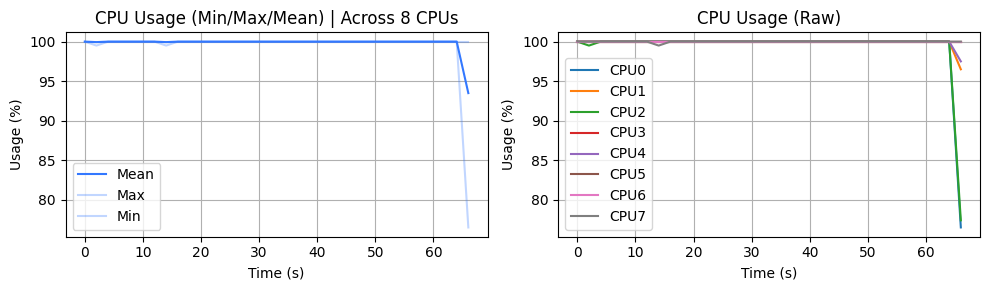

In [10]:
%%display_graph_for_last

Button(description='Add Display', style=ButtonStyle())

Output()

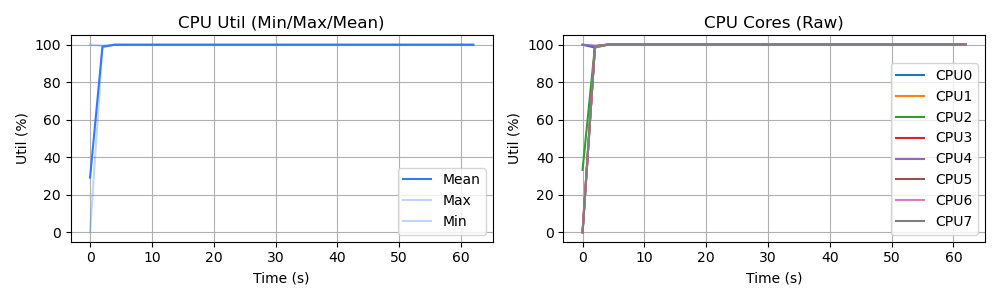

In [7]:
%%display_graph_for_index 0

Button(description='Add Display', style=ButtonStyle())

Output()

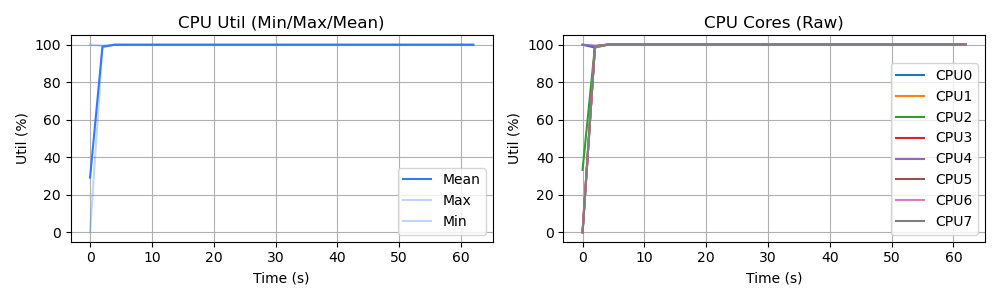

In [8]:
%%display_graph_for_all

In [9]:
%%display_code_history

In [10]:
%%display_code_for_index 0

Cell timestamp: 2024-05-11 00:31:34.607913
--
# 10⁹ iterations on 4 CPUs.on_click(partial(generate_plot, x=x, y=y))
compute_pi(10**9, 8)

In [11]:
%%perfdata_to_variable myvar

Exported performance data to myvar variable

In [12]:
%%perfdata_to_json myfile

Exported performance data to myfile_perfdata.json and myfile_code.json

---
**Plans:**
- retrieve metrics on multiple nodes (add network, psutil delivers that)
- parallel serialization (for scorep)
- show index as thumbnail or so when hovering the graphs